In [2]:
import pandas as pd
from google.colab import drive

#Load 'all' CSV file
drive.mount('/content/drive', force_remount=True)
file_path = '/content/drive/MyDrive/wealthnet_features_returns/banknifty.csv'

data = pd.read_csv(file_path)

data.dtypes

Mounted at /content/drive


Datetime                    object
Open                       float64
High                       float64
Low                        float64
Close                      float64
Index Name                  object
1_Min_Returns              float64
5_Min_Returns              float64
10_Min_Returns             float64
1_Min_Returns_MIDCAP       float64
5_Min_Returns_MIDCAP       float64
10_Min_Returns_MIDCAP      float64
1_Min_Returns_FINNIFTY     float64
5_Min_Returns_FINNIFTY     float64
10_Min_Returns_FINNIFTY    float64
1_Min_Returns_NIFTY        float64
5_Min_Returns_NIFTY        float64
10_Min_Returns_NIFTY       float64
dtype: object

In [4]:
data['Target_t+5_Return'] = data['5_Min_Returns'].shift(-5)

data.dropna(inplace=True)
data.reset_index(inplace=True)
data.drop(['index', 'level_0'], axis=1, inplace=True)
data.drop('Datetime', axis=1, inplace=True)
data.drop('Index Name', axis=1, inplace=True)
data.head(10)

,Open,High,Low,Close,1_Min_Returns,5_Min_Returns,10_Min_Returns,1_Min_Returns_MIDCAP,5_Min_Returns_MIDCAP,10_Min_Returns_MIDCAP,1_Min_Returns_FINNIFTY,5_Min_Returns_FINNIFTY,10_Min_Returns_FINNIFTY,1_Min_Returns_NIFTY,5_Min_Returns_NIFTY,10_Min_Returns_NIFTY,Target_t+5_Return
0,43079.55,43086.25,43018.85,43018.85,-14.345187,-3.775988,-23.064453,-7.777778,0.000000,-18.867925,-13.718505,-12.535090,-23.884303,-9.017704,-4.469520,-11.579403,-3.219519
1,43017.30,43026.90,42998.75,43023.60,1.104167,0.662471,-19.046205,-4.239408,-2.849835,-16.312421,-0.738284,-6.561628,-29.079551,-3.036217,-3.201775,-17.309288,-2.614844
2,43023.50,43033.05,42985.20,42995.65,-6.496435,-8.226618,-18.989053,-4.310734,-11.047497,-20.061921,-4.192706,-12.251802,-25.208603,-3.009528,-7.148121,-14.919405,26.839925
3,42992.65,43012.40,42973.65,42997.95,0.534938,-20.482196,-7.459903,-2.434529,-22.353039,-10.494784,0.712268,-19.219226,-15.775737,-1.021891,-16.077436,-6.210974,35.827289
4,43000.85,43024.90,42982.90,42988.35,-2.232665,-21.424932,-15.723690,-3.896194,-22.638889,-18.341230,-3.745733,-21.670498,-20.961048,-4.143223,-20.213998,-12.970634,37.126338
5,42983.70,43006.00,42965.20,43005.00,3.873142,-3.219519,-6.994291,11.066720,-3.822417,-3.822417,3.562419,-4.403335,-16.932906,4.891030,-6.320851,-10.787546,43.692594
6,43003.10,43015.05,42985.85,43012.35,1.709104,-2.614844,-1.952546,-10.637336,-10.220612,-13.067534,-0.448441,-4.113599,-10.672527,-3.839100,-7.123471,-10.322965,41.302091
7,43012.75,43126.75,43010.50,43111.05,22.946898,26.839925,18.591227,12.458241,6.538448,-4.516272,18.729852,18.809141,6.534295,8.952131,4.833266,-2.318309,24.796427
8,43108.40,43162.00,43080.75,43152.00,9.498725,35.827289,15.271711,2.085375,11.062409,-11.315358,9.716049,27.829216,8.556505,5.852328,11.711510,-4.384755,22.397571
9,43153.25,43153.60,43123.75,43147.95,-0.938543,37.126338,15.621863,2.918917,17.887718,-4.791667,0.552409,32.140935,10.400786,0.027589,15.888938,-4.357178,13.569590


In [5]:
dataset_features = data.iloc[:, 4:17]
# print(dataset_features)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(dataset_features)
print(data_set_scaled.shape)

(467075, 13)


In [13]:
import numpy as np
#multiple features from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 1
# backcandles is the number of previous minutes of data you want to base the prediction on, testing with previous 5 minutes of data

print(data_set_scaled.shape[0])

# The correct range should be based on the number of features you want to extract, which is 12 (from column 4 to 16)- not using OHLC numbers. Used to be 13 here.
for j in range(12):
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):
        X[j].append(data_set_scaled[i-backcandles:i, j]) # Also adjusted the column index here to ignore the OHLC numbers, since we only want the 13 features for returns, not including target?

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)

# Choose -1 for last column, ...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

467075
[[[0.59528835 0.58619395 0.51115147 ... 0.40933036 0.42939948 0.44202644]]

 [[0.63133127 0.59596158 0.51911224 ... 0.43275475 0.43435169 0.42113632]]

 [[0.61359928 0.57639953 0.51922546 ... 0.43285926 0.41893602 0.4298494 ]]

 ...

 [[0.60662266 0.55689918 0.53636756 ... 0.43675992 0.40592481 0.46883864]]

 [[0.64019857 0.56703027 0.52324896 ... 0.44152501 0.41636363 0.44708231]]

 [[0.62074418 0.57438592 0.5193969  ... 0.43415749 0.40867234 0.44175698]]]
(467074, 1, 12)
[[0.58874925]
 [0.65356981]
 [0.67334814]
 ...
 [0.55518141]
 [0.57657514]
 [0.58414777]]
(467074, 1)


In [24]:
#split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

373659
(373659, 1, 12)
(93415, 1, 12)
(373659, 1)
(93415, 1)
[[0.58874925]
 [0.65356981]
 [0.67334814]
 ...
 [0.59704561]
 [0.59411444]
 [0.59411444]]


In [25]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np

#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 12), name='lstm_input') #13 is the number of feature columns
inputs = LSTM(10, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
# tried with relu activation, output was only 0, check in meeting about hyperparameter tuning

model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=20, epochs=2, shuffle=True, validation_split = 0.1)

Epoch 1/2
16815/16815 [==============================] - 70s 4ms/step - loss: 8.3490e-04 - val_loss: 1.0935e-04
Epoch 2/2
16815/16815 [==============================] - 73s 4ms/step - loss: 2.7663e-04 - val_loss: 1.2378e-04


In [16]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)

for i in range(100):
    print(y_pred[i], y_test[i])

2920/2920 [==============================] - 7s 2ms/step
[0.6017014] [0.59411444]
[0.60122496] [0.59411444]
[0.60112566] [0.59411444]
[0.60064965] [0.59411444]
[0.60081524] [0.59411444]
[0.60033804] [0.59411444]
[0.60023934] [0.58262007]
[0.5997625] [0.58262007]
[0.6009008] [0.58262007]
[0.60042405] [0.58262007]
[0.6003244] [0.58262007]
[0.5998481] [0.58262007]
[0.5923139] [0.58262007]
[0.59276104] [0.58262007]
[0.59283537] [0.58516058]
[0.59328425] [0.58516058]
[0.5924608] [0.58516058]
[0.5929091] [0.58516058]
[0.5929803] [0.58516058]
[0.59343046] [0.58516058]
[0.5936538] [0.58516058]
[0.59409857] [0.58516058]
[0.59417313] [0.58607657]
[0.5946197] [0.58607657]
[0.593794] [0.58607657]
[0.59424] [0.58607657]
[0.5943114] [0.58607657]
[0.5947593] [0.58607657]
[0.592915] [0.58607657]
[0.59297246] [0.58607657]
[0.5922517] [0.58392502]
[0.5923098] [0.58392502]
[0.59262717] [0.58392502]
[0.59268326] [0.58392502]
[0.5919649] [0.58392502]
[0.5920216] [0.58392502]
[0.59235966] [0.58392502]
[0.59

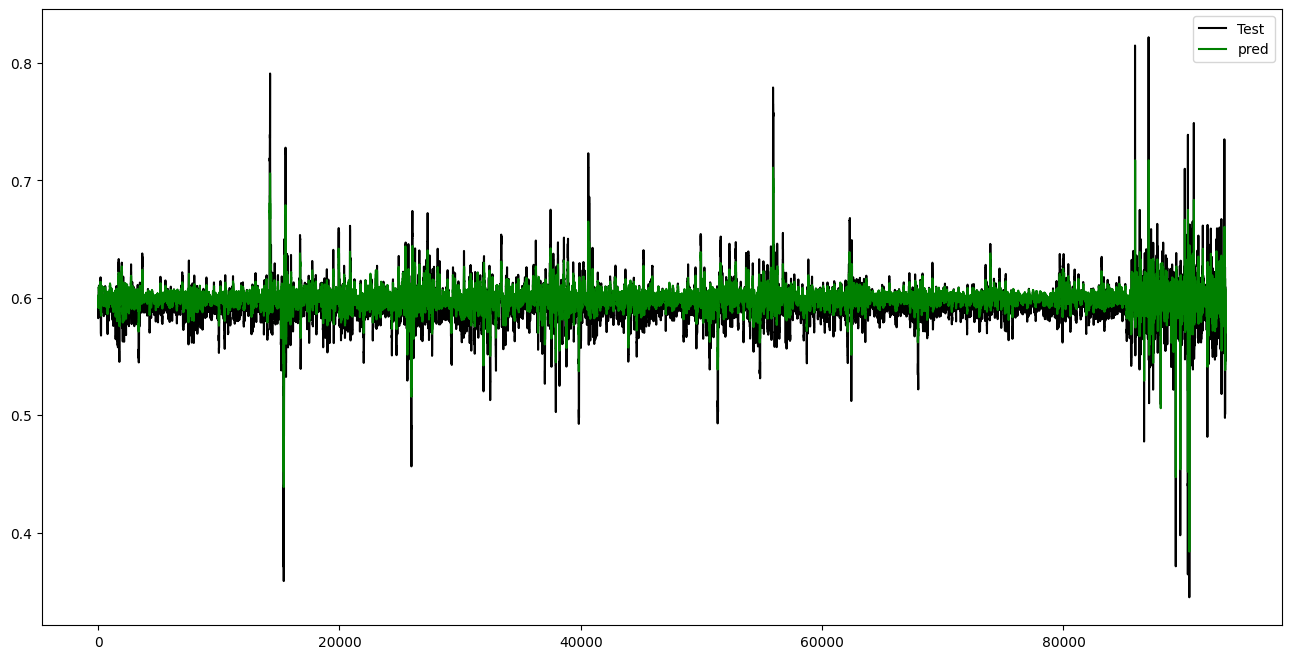

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
# plt.plot(y_train, color='red', label = 'Train')
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming 'predictions' and 'actual_returns' are your model's outputs and true values, respectively
mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# correlation = np.corrcoef(y_test, y_pred)[0, 1]

print(mse)
# print(rmse)
# print(correlation)

0.00016186897700240648


In [21]:
# print(y_test[0:50])
print(y_train[-100:-50])
# Question on why the values might be repeating right after train test split, am not able to figure out why

[[0.58903252]
 [0.58903252]
 [0.58825442]
 [0.58825442]
 [0.58825442]
 [0.58825442]
 [0.58825442]
 [0.58825442]
 [0.58825442]
 [0.58825442]
 [0.58905561]
 [0.58905561]
 [0.58905561]
 [0.58905561]
 [0.58905561]
 [0.58905561]
 [0.58905561]
 [0.58905561]
 [0.58898695]
 [0.58898695]
 [0.58898695]
 [0.58898695]
 [0.58898695]
 [0.58898695]
 [0.58898695]
 [0.58898695]
 [0.58715567]
 [0.58715567]
 [0.58715567]
 [0.58715567]
 [0.58715567]
 [0.58715567]
 [0.58715567]
 [0.58715567]
 [0.5934733 ]
 [0.5934733 ]
 [0.5934733 ]
 [0.5934733 ]
 [0.5934733 ]
 [0.5934733 ]
 [0.5934733 ]
 [0.5934733 ]
 [0.59203075]
 [0.59203075]
 [0.59203075]
 [0.59203075]
 [0.59203075]
 [0.59203075]
 [0.59203075]
 [0.59203075]]
